# Notebook 2: Explorative Datenanalyse (EDA) und Datenvorverarbeitung

## Detaillierte EDA

### Berechnung und Visualisierung von Korrelationen

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/theavengerscroissant/htw-awe-ki-ana/blob/main/notebooks/lecture_2_preparation.ipynb)

<Figure size 1200x800 with 0 Axes>

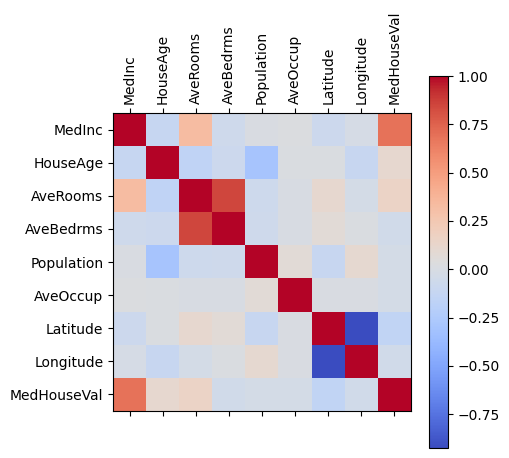

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Laden des Beispiel-Datensatzes (California Housing Dataset)
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()
df_california_housing = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Berechnung der Korrelationen
df_california_housing['MedHouseVal'] = california_housing.target
correlation_matrix = df_california_housing.corr()

# Visualisierung der Korrelationen
plt.figure(figsize=(12, 8))
cax = plt.matshow(correlation_matrix, cmap='coolwarm')
plt.colorbar(cax)
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.show()

In [ ]:
print(california_housing.target[:5])  # Zeigt die ersten 5 Werte des Targets


[4.526 3.585 3.521 3.413 3.422]


## Datenvorverarbeitung

### Feature Scaling: Normalisierung oder Standardisierung

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardisierung der Features
scaler = StandardScaler()
df_california_housing_scaled = pd.DataFrame(scaler.fit_transform(df_california_housing), columns=df_california_housing.columns)

# Überprüfen der skalierten Daten
df_california_housing_scaled.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835,2.129631
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844,1.314156
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827,1.258693
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818,1.165100
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818,1.172900


### Aufteilung der Daten in Trainings-, Test- und Validierungsdaten

In [ ]:
print(df_california_housing.columns)

In [ ]:
from sklearn.model_selection import train_test_split

# Aufteilen der Daten in Trainings-, Test- und Validierungsdaten
X_train, X_temp, y_train, y_temp = train_test_split(df_california_housing_scaled, california_housing.target, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Überprüfen der Aufteilung
print(f'Train set: {X_train.shape}, {y_train.shape}')
print(f'Test set: {X_test.shape}, {y_test.shape}')
print(f'Validation set: {X_val.shape}, {y_val.shape}')